# Introduction to Regression with Neural Networks in TensorFlow

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
tf.config.list_physical_devices("GPU")

[]

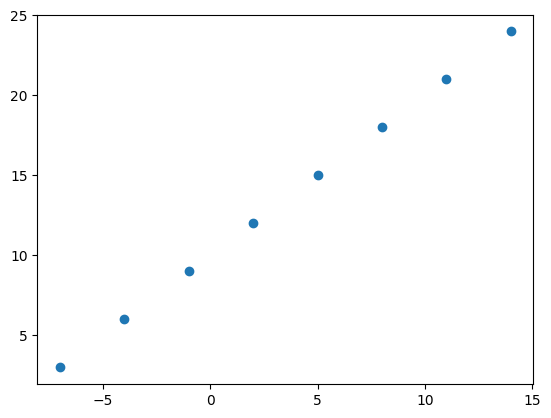

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [5]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [6]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [7]:
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [9]:
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

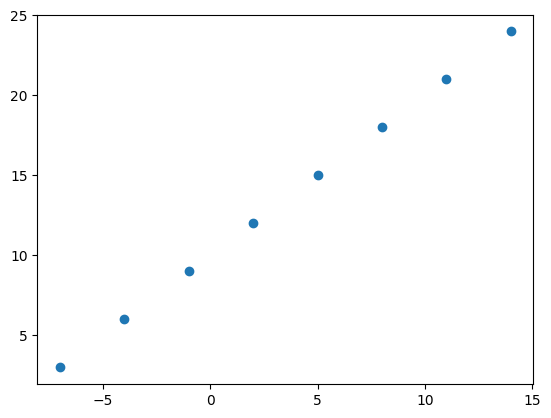

In [11]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

In [12]:
tf.random.set_seed(42)

# Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 13.8212 - mae: 13.8212
Epoch 2/5
1/1 [==============================] - 0s 31ms/step - loss: 13.6887 - mae: 13.6887
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 13.5562 - mae: 13.5562
Epoch 4/5
1/1 [==============================] - 0s 31ms/step - loss: 13.4237 - mae: 13.4237
Epoch 5/5
1/1 [==============================] - 0s 26ms/step - loss: 13.2912 - mae: 13.2912


In [13]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 396ms/step


array([[1.4650893]], dtype=float32)

In [14]:
y_pred + 11

array([[12.46509]], dtype=float32)

## Improving our model

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.5858 - mae: 8.5858
Epoch 2/100
1/1 [==============================] - 0s 26ms/step - loss: 8.4533 - mae: 8.4533
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 8.3208 - mae: 8.3208
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 8.1883 - mae: 8.1883
Epoch 5/100
1/1 [==============================] - 0s 23ms/step - loss: 8.0558 - mae: 8.0558
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 7.9233 - mae: 7.9233
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 7.7908 - mae: 7.7908
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 7.6583 - mae: 7.6583
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 7.5258 - mae: 7.5258
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 7.4325 - mae: 7.4325
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss

In [16]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
model.predict([17.0])

1/1 [==============================] - 0s 109ms/step


array([[29.99644]], dtype=float32)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=tf.keras.metrics.mae)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.6593 - mean_absolute_error: 15.6593
Epoch 2/100
1/1 [==============================] - 0s 30ms/step - loss: 14.5958 - mean_absolute_error: 14.5958
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0269 - mean_absolute_error: 14.0269
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 13.4623 - mean_absolute_error: 13.4623
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 12.8992 - mean_absolute_error: 12.8992
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 12.3345 - mean_absolute_error: 12.3345
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7654 - mean_absolute_error: 11.7654
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1889 - mean_absolute_error: 11.1889
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 10.6019 - mean_absolute_error: 10.6019
Epo

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.metrics.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.05),
              metrics=(["mae"]))

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 10.5667 - mae: 10.5667
Epoch 2/100
1/1 [==============================] - 0s 35ms/step - loss: 10.5622 - mae: 10.5622
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5577 - mae: 10.5577
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 10.5532 - mae: 10.5532
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 10.5487 - mae: 10.5487
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5442 - mae: 10.5442
Epoch 7/100
1/1 [==============================] - 0s 47ms/step - loss: 10.5397 - mae: 10.5397
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 10.5352 - mae: 10.5352
Epoch 9/100
1/1 [==============================] - 0s 29ms/step - loss: 10.5307 - mae: 10.5307
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5262 - mae: 10.5262
Epoch 11/100
1/1 [==============================] -

In [20]:
model.predict([17])

1/1 [==============================] - 0s 266ms/step


array([[16.047472]], dtype=float32)

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.1512 - mae: 12.1512
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 12.0814 - mae: 12.0814
Epoch 3/100
1/1 [==============================] - 0s 22ms/step - loss: 12.0115 - mae: 12.0115
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 11.9416 - mae: 11.9416
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 11.8717 - mae: 11.8717
Epoch 6/100
1/1 [==============================] - 0s 22ms/step - loss: 11.8017 - mae: 11.8017
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 11.7316 - mae: 11.7316
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 11.6615 - mae: 11.6615
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 11.5913 - mae: 11.5913
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 11.5210 - mae: 11.5210
Epoch 11/100
1/1 [==============================] -

In [22]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [23]:
model.predict([17])

1/1 [==============================] - 0s 109ms/step


array([[31.315773]], dtype=float32)

Maybe the model above is overfitting.

## Evaluating a model

In [24]:
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

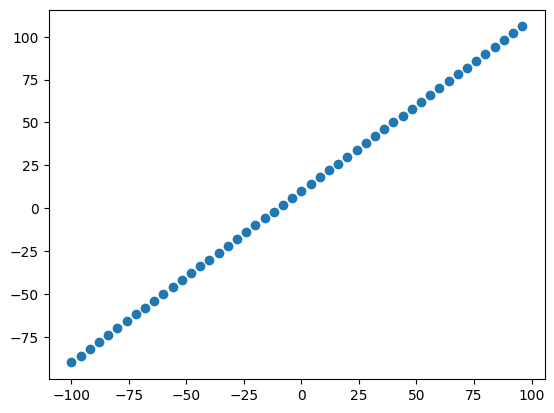

In [26]:
# Visualize
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40,), (10,), (40,), (10,))

In [28]:
len(X)

50

In [29]:
X_train = X[:40]
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

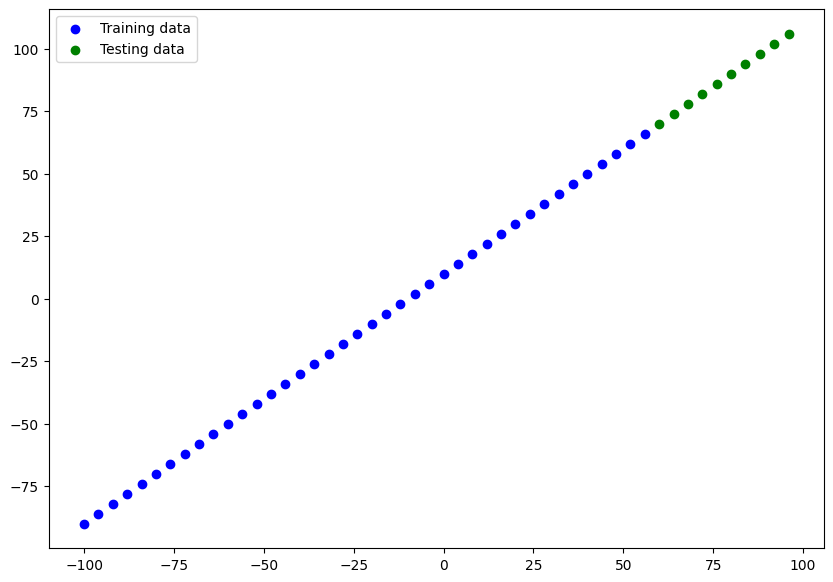

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [32]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [33]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Let's fit our model.
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 0s 13ms/step - loss: 47.9114 - mae: 47.9114
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 16.2691 - mae: 16.2691
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 15.2291 - mae: 15.2291
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9605 - mae: 7.9605
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.2358 - mae: 10.2358
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4920 - mae: 9.4920
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.6235 - mae: 8.6235
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 9.0596 - mae: 9.0596
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.8633 - mae: 18.8633
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 10.1844 - mae: 10.1844
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - 

In [35]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.build(input_shape=[None, 2])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [38]:
type(X_train)

tensorflow.python.framework.ops.EagerTensor

In [39]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

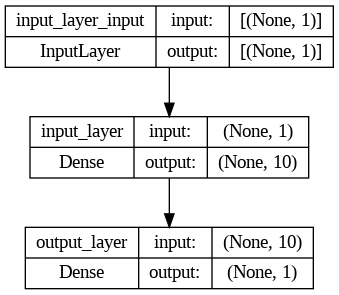

In [40]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=[1], name="hidden_layer_1"),
    tf.keras.layers.Dense(10, name="hidden_layer_2"),
    tf.keras.layers.Dense(5, name="hidden_layer_3"),
    tf.keras.layers.Dense(1, name="output_layer")
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 5)                 10        
                                                                 
 hidden_layer_2 (Dense)      (None, 10)                60        
                                                                 
 hidden_layer_3 (Dense)      (None, 5)                 55        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

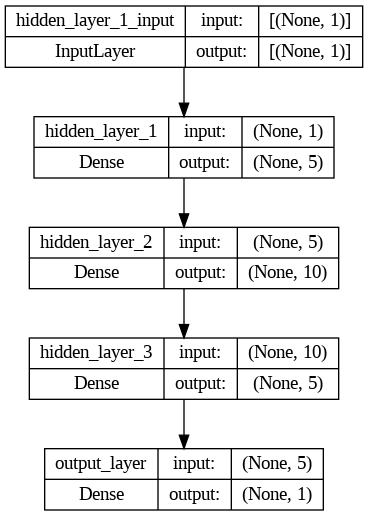

In [43]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

In [44]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 74ms/step


array([[56.79107 ],
       [60.419724],
       [64.04838 ],
       [67.67704 ],
       [71.305695],
       [74.93435 ],
       [78.563   ],
       [82.19165 ],
       [85.820305],
       [89.44896 ]], dtype=float32)

In [45]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [46]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(5, input_shape=[1]),
  tf.keras.layers.Dense(1)
   # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(lr=0.01),
              metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [47]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 55ms/step


array([[ 76.26102],
       [ 81.2303 ],
       [ 86.19957],
       [ 91.16885],
       [ 96.13814],
       [101.10741],
       [106.07669],
       [111.04597],
       [116.01525],
       [120.98453]], dtype=float32)

In [48]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [49]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  plt.legend();

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape, y_pred.shape

(TensorShape([40]),
 TensorShape([40]),
 TensorShape([10]),
 TensorShape([10]),
 (10, 1))

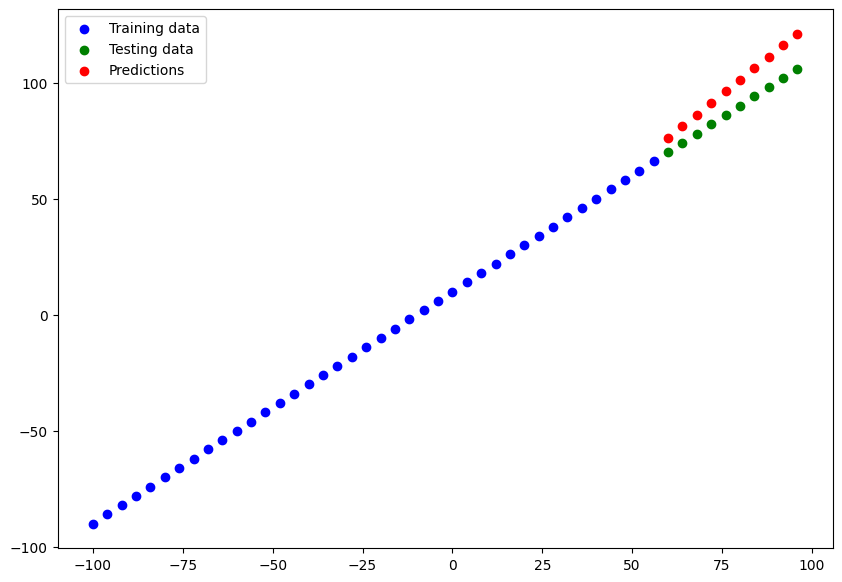

In [51]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

## Evaluating our model's predictions with regression evaluation metrics

In [52]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 159ms/step - loss: 10.6228 - mae: 10.6228


[10.622771263122559, 10.622771263122559]

In [53]:
y_pred

array([[ 76.26102],
       [ 81.2303 ],
       [ 86.19957],
       [ 91.16885],
       [ 96.13814],
       [101.10741],
       [106.07669],
       [111.04597],
       [116.01525],
       [120.98453]], dtype=float32)

In [54]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [55]:
tf.keras.losses.MAE(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.44339 , 11.10788 , 10.      , 10.23377 , 11.655255, 14.264444,
       18.07669 , 23.045967, 28.015253, 32.984528], dtype=float32)>

In [56]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.44339 , 11.10788 , 10.      , 10.23377 , 11.655255, 14.264444,
       18.07669 , 23.045967, 28.015253, 32.984528], dtype=float32)>

In [57]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.622772>

In [58]:
mse = tf.metrics.mean_squared_error(y_test,
                                   tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=120.59418>

In [59]:
tf.keras.losses.mae(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=10.622772>

In [68]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

## Running experiments to improve our model

In [61]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

1.`model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs
4. `model_4` - 3 layers, trained for 100 epochs
5. `model_5` - 3 layers, trained for 500 epochs

In [64]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 19ms/step - loss: 103.1562 - mae: 103.1562
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 67.7008 - mae: 67.7008
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 30.3595 - mae: 30.3595
Epoch 4/100
2/2 [==============================] - 0s 32ms/step - loss: 9.9362 - mae: 9.9362
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8961 - mae: 10.8961
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 10.0758 - mae: 10.0758
Epoch 7/100
2/2 [==============================] - 0s 12ms/step - loss: 9.1140 - mae: 9.1140
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.1194 - mae: 9.1194
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 15.0357 - mae: 15.0357
Epoch 10/100
2/2 [==============================] - 0s 14ms/step - loss: 7.6205 - mae: 7.6205
Epoch 11/100
2/2 [==============================] - 0s 

1/1 [==============================] - 0s 21ms/step


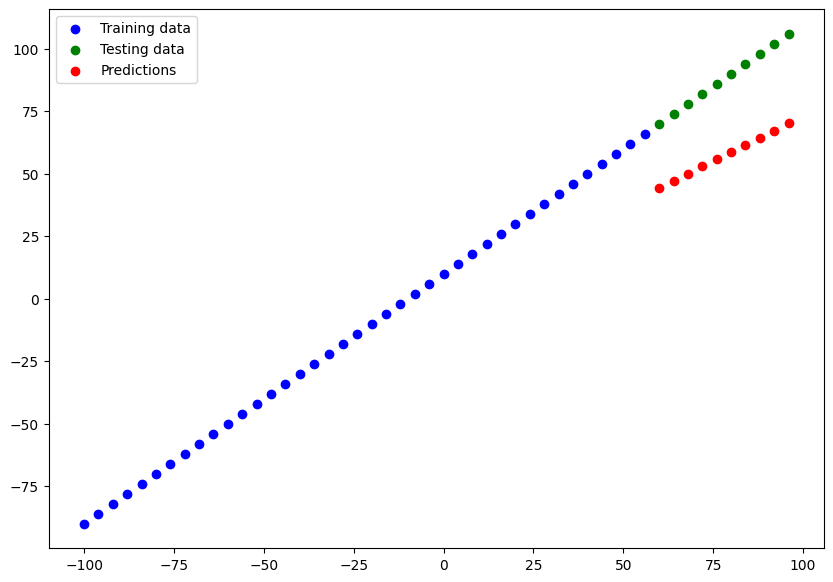

In [66]:
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [69]:
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.754303>,
 <tf.Tensor: shape=(), dtype=float32, numpy=956.3375>)

In [71]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 74.1770 - mae: 74.1770
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 21.1135 - mae: 21.1135
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 22.4171 - mae: 22.4171
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 12.7685 - mae: 12.7685
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 13.9464 - mae: 13.9464
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1590 - mae: 11.1590
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.1470 - mae: 12.1470
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8583 - mae: 10.8583
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.7091 - mae: 37.7091
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 25.3413 - mae: 25.3413
Epoch 11/100
2/2 [==============================] - 0s 6m

In [72]:
y_preds_2 = model_2.predict(X_test)

1/1 [==============================] - 0s 55ms/step


In [73]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=17.62944>,
 <tf.Tensor: shape=(), dtype=float32, numpy=325.31137>)

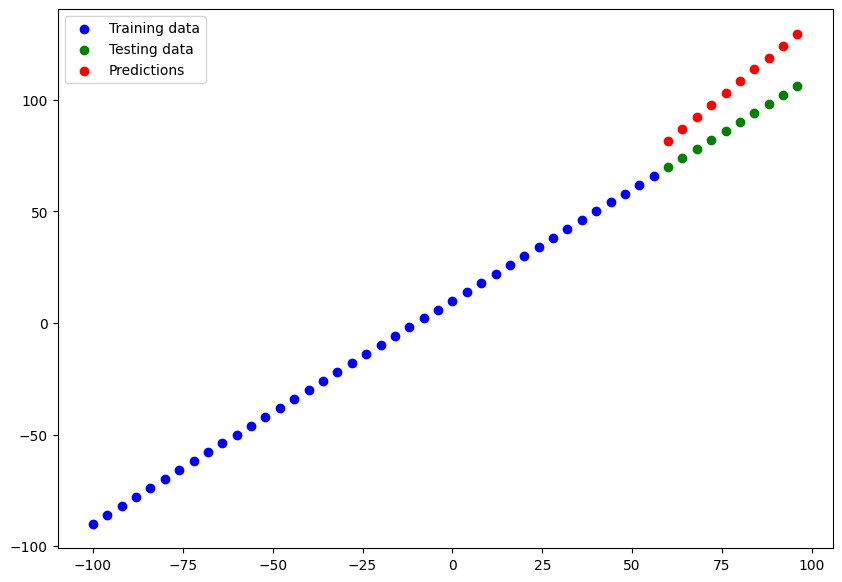

In [74]:
plot_predictions(predictions=y_preds_2)

In [76]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

In [77]:
y_preds_3 = model.predict(X_test)

1/1 [==============================] - 0s 52ms/step


In [78]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=10.622772>,
 <tf.Tensor: shape=(), dtype=float32, numpy=120.59418>)

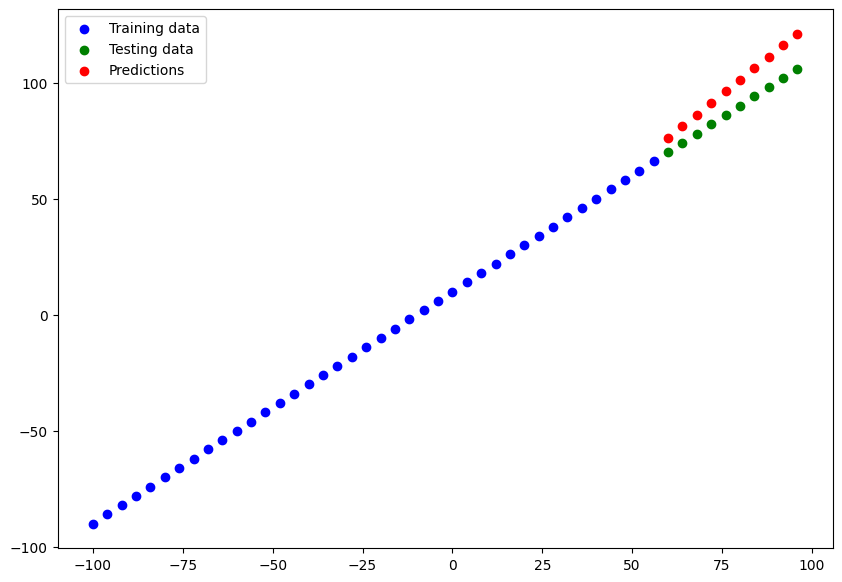

In [79]:
plot_predictions(predictions=y_preds_3)

## Comparing the results of our experiments

In [81]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.754303,956.337524
1,model_2,17.629440,325.311371
2,model_3,10.622772,120.594177


<Axes: xlabel='Model No.', ylabel='Error Value'>

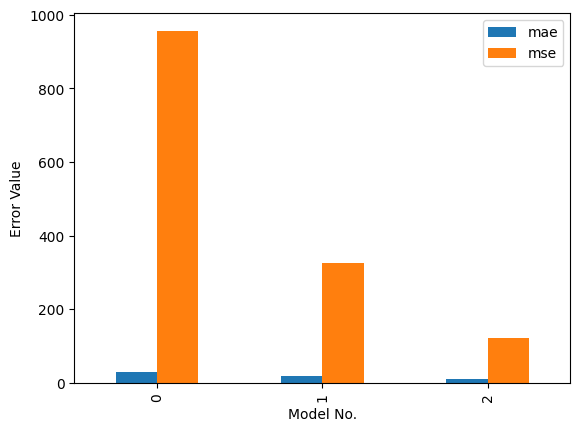

In [87]:
all_results.plot.bar(xlabel="Model No.",
                     ylabel="Error Value")

## Tracking your experiments

We can use TensorBoard (will be covered later) to track the various experiments.

## TensorBoard

## Savaing our models

In [88]:
model_2.save("best_model_SavedModel_format")

In [89]:
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [90]:
loaded_SavedModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 8         
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [91]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 8         
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Compare model_2 predictions with SaveModel format
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 25ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [99]:
model_2_preds, loaded_SavedModel_format_preds

(array([[ 81.66071],
        [ 86.98709],
        [ 92.31348],
        [ 97.63987],
        [102.96625],
        [108.29263],
        [113.61902],
        [118.9454 ],
        [124.27178],
        [129.59818]], dtype=float32),
 array([[ 81.66071],
        [ 86.98709],
        [ 92.31348],
        [ 97.63987],
        [102.96625],
        [108.29263],
        [113.61902],
        [118.9454 ],
        [124.27178],
        [129.59818]], dtype=float32))

In [100]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [101]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 8         
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [102]:
model_2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 4)                 8         
                                                                 
 dense_19 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [104]:
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

In [105]:
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>